In [1]:
using LinearAlgebra
using Plots
using CSV, DataFrames
using Random
using Distributions
Random.seed!(1234);  # determinism

In [2]:
df = CSV.File("wdbc.data", header=0) |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32
,Int64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072


In [3]:
labels = df[:,2]
A = Matrix(df[:,3:end])
m, n = size(A)
# Pre-process data a bit
A = (I - ones(m, m) / m) * A  # subtract mean
for j = 1:n; A[:, j] = normalize(A[:, j]); end  # unit variance

In [4]:
V2 = svd(A).V[:, 1:2]
pcs = A * V2

569×2 Array{Union{Missing, Float64},2}:
 -0.385384    -0.0816889 
 -0.100102     0.15797   
 -0.240377     0.0450736 
 -0.29861     -0.430775  
 -0.164976     0.0816674 
 -0.0997852   -0.16559   
 -0.0938589    0.112772  
 -0.0898517   -0.0981081 
 -0.1331      -0.142192  
 -0.266279    -0.32394   
  0.0339743    0.111483  
 -0.11114     -0.00279067
 -0.343134    -0.113231  
  ⋮                      
  0.170366    -0.00512157
  0.00413635   0.00895289
  0.045669    -0.054199  
  0.0201969    0.00746297
  0.204174     0.0893406 
 -0.248079    -0.146     
 -0.366456     0.0240572 
 -0.26995      0.149948  
 -0.159027     0.150251  
 -0.0526618    0.0797484 
 -0.434934    -0.0700943 
  0.229534     0.0281146 

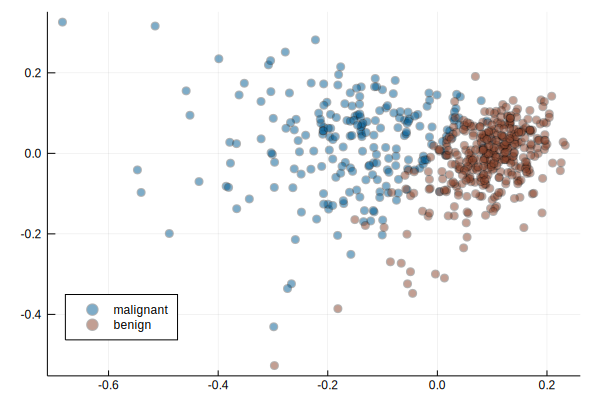

In [5]:
inds_M = findall(labels .== "M")
inds_B = findall(labels .== "B")
scatter(pcs[inds_M,1], pcs[inds_M,2], alpha=0.3, label="malignant", 
        legend=:bottomleft, title="")
scatter!(pcs[inds_B,1], pcs[inds_B,2], alpha=0.3, label="benign")

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/qh1wV/src/args.jl:744


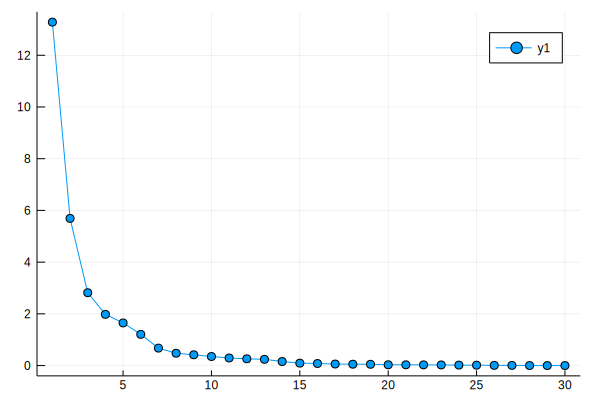

In [6]:
vals = vec(svd(A).S)
plot(sort(vals .^ 2, rev=true), marker="o")
#sum(vals[1:2].^2) / sum(vals .^ 2)

In [7]:
V2  # interpretable??

30×2 Array{Float64,2}:
 -0.218902    0.233857  
 -0.103725    0.0597061 
 -0.227537    0.215181  
 -0.220995    0.231077  
 -0.14259    -0.186113  
 -0.239285   -0.151892  
 -0.2584     -0.0601654 
 -0.260854    0.0347675 
 -0.138167   -0.190349  
 -0.0643633  -0.366575  
 -0.205979    0.105552  
 -0.017428   -0.0899797 
 -0.211326    0.0894572 
  ⋮                     
 -0.0424984  -0.183848  
 -0.102568   -0.280092  
 -0.227997    0.219866  
 -0.104469    0.0454673 
 -0.23664     0.199878  
 -0.224871    0.219352  
 -0.127953   -0.172304  
 -0.210096   -0.143593  
 -0.228768   -0.0979641 
 -0.250886    0.00825724
 -0.122905   -0.141883  
 -0.131784   -0.275339  

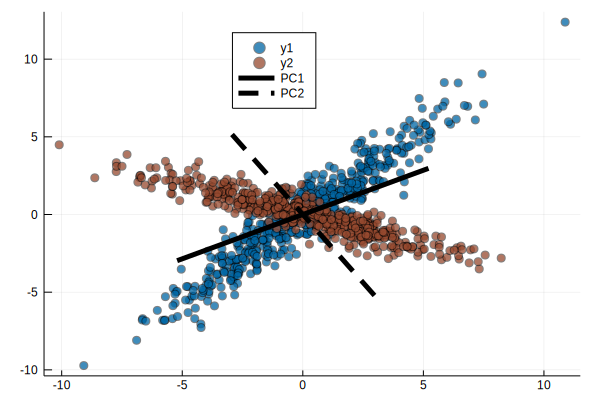

In [8]:
nsamp = 500
d1,d2,o = 8.0, 10.0, 8.5; 
s1 = rand(MvNormal([0.0,0.0], [d1 o; o d2]), nsamp)'; 
d1,d2,o = 10.0, 2.0, -4.1; 
s2 = rand(MvNormal([0.0,0.0], [d1 o; o d2]), nsamp)';

scatter(s1[:,1], s1[:,2], alpha=0.5)
scatter!(s2[:,1], s2[:,2], alpha=0.5)

A = [s1; s2]
F = svd(A)
V = F.V
dir1x, dir1y = [-V[1,1], V[1,1]], [-V[2,1], V[2,1]]
dir2x, dir2y = [-V[1,2], V[1,2]], [-V[2,2], V[2,2]]
plot!(6 * dir1x, 6 * dir1y, lw=5, color="black", label="PC1")
plot!(6 * dir2x, 6 * dir2y, lw=5, color="black", label="PC2", 
      ls=:dash, legend=:top)

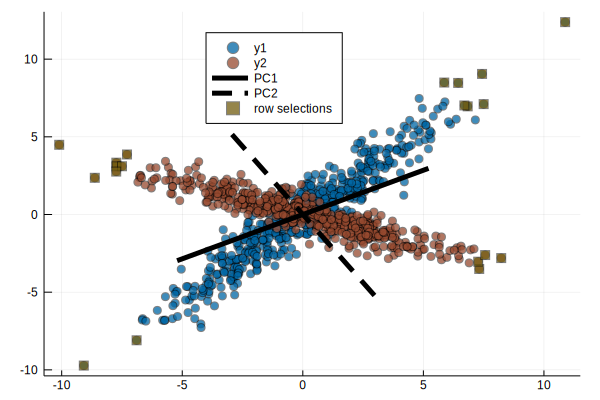

In [9]:
S = [1, 2]
T = sortperm(vec(sum(F.U .^ 2, dims=2)), rev=true)[1:20]
scatter!(A[T, 1], A[T, 2], marker=:square, alpha=0.5, label="row selections")

In [10]:
C = A[:, S]
R = A[T, :]
U = pinv(C) * A * pinv(R)

2×20 Array{Float64,2}:
 0.00542166  -0.0108409   -0.00475011  …   0.00784288  0.00370584  0.00355923
 0.0132758    0.00991037  -0.0102278      -0.00637697  0.00720143  0.00733205

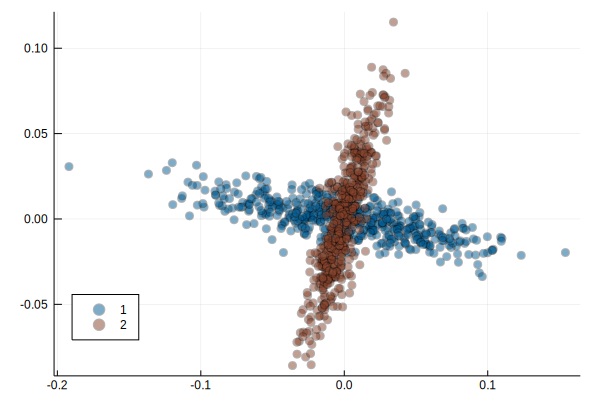

In [11]:
m, n = size(A)
# Pre-process data a bit
A = (I - ones(m, m) / m) * A  # subtract mean
for j = 1:n; A[:, j] = normalize(A[:, j]); end  # unit variance
pcs = A * svd(A).V;
scatter(pcs[1:nsamp,1], pcs[1:nsamp,2], alpha=0.3, label="1", 
        legend=:bottomleft, title="")
scatter!(pcs[(nsamp+1):end,1], pcs[(nsamp+1):end,2], alpha=0.3, label="2")